<a href="https://colab.research.google.com/github/rohitdanda/DeepLearning_DataSets/blob/master/Lesson2_Customdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
folder = 'bmw'
file='/content/drive/My Drive/bmw.csv'

In [0]:
from fastai.vision import Path
path = Path('data/cars')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)

In [3]:
path.ls()

[PosixPath('data/cars/bmw')]

In [4]:
from fastai.vision import download_images

download_images(path/file,dest,max_pics=500)

In [5]:
folder2 = 'audi'
fileaudio='/content/drive/My Drive/audi.csv'

from fastai.vision import Path

path = Path('data/cars')
destaudio = path/folder2
dest.mkdir(parents=True,exist_ok=True)

from fastai.vision import download_images
download_images(path/fileaudio,destaudio,max_pics=500)

In [6]:
folder3='porsche'
fileporsche = '/content/drive/My Drive/porsche.csv'

from fastai.vision import Path

path = Path('data/cars')
destporch = path/folder3
destporch.mkdir(parents=True,exist_ok=True)

from fastai.vision import download_images
download_images(path/fileporsche,destporch,max_pics=500)

In [7]:
classes = ['audi','bmw','porsche']
from fastai.vision import verify_images
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_size=500)

audi


bmw


porsche


In [0]:
import numpy as np
from fastai.vision import ImageDataBunch,get_transforms,imagenet_stats
np.random.seed(42)
data_bunch = ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224).normalize(imagenet_stats)

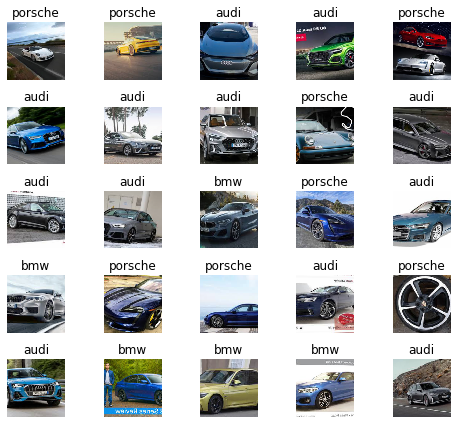

In [9]:
data_bunch.show_batch(5,figsize=(7,6))

In [10]:
data_bunch.classes

['audi', 'bmw', 'porsche']

In [11]:
from fastai.vision import cnn_learner,models
from fastai.metrics import error_rate

learner = cnn_learner(data_bunch,models.resnet34,metrics=(error_rate))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [12]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [13]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.203960,1.906467,0.616667,00:03
1,1.788006,1.309091,0.466667,00:02
2,1.516397,1.034697,0.383333,00:02
3,1.321236,0.905465,0.283333,00:02


In [0]:
learner.save('stage-1')

In [0]:
learner.unfreeze()

In [16]:
learner.lr_find(start_lr=1e-5,end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


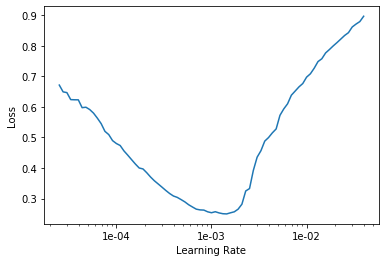

In [17]:
learner.recorder.plot()

In [18]:
learner.unfreeze()
learner.fit_one_cycle(4,max_lr=slice(3e-7,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.814877,0.912095,0.300000,00:02
1,0.733531,1.016938,0.316667,00:02
2,0.652905,0.991270,0.300000,00:02
3,0.583425,0.945735,0.266667,00:02


In [0]:
learner.save('stage-2')

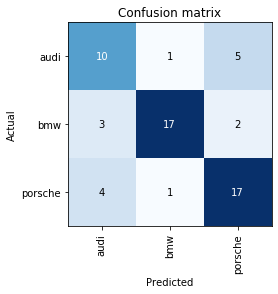

In [20]:
from fastai.vision import ClassificationInterpretation
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

In [21]:
interp.most_confused(min_val=2)

[('audi', 'porsche', 5),
 ('porsche', 'audi', 4),
 ('bmw', 'audi', 3),
 ('bmw', 'porsche', 2)]

In [0]:
classes = ['audi','bmw','porsche']

data_bunch_dummy = ImageDataBunch.single_from_classes(path,classes,ds_tfms=get_transforms(),size=224).normalize(imagenet_stats)

In [24]:
learner2 = cnn_learner(data_bunch_dummy,models.resnet34,metrics=error_rate)

learner2.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/cars;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/cars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): Basi

In [26]:
from fastai.vision import open_image
image = open_image('/content/drive/My Drive/test.jpg')
pred_class,pred_index,output = learner2.predict(image)
print(pred_class)

bmw


In [27]:
image2 = open_image('/content/drive/My Drive/test2.jpg')

pred_class2,pred_index2,output2 = learner2.predict(image2)

print(pred_class2)

audi
